1-DEFINE THE PROBLEM

We are exploring the contents of the imagenet_class_names.txt file, which includes the class labels used in ImageNet-based deep learning models. This notebook will help uns understand the label structure and prepare it for use in machine learning pipelines.

2- IMPORT REQUIRED LIBRARIES 

2.1 - Base Libraries

I will use pandas for data handling (DataFrames),
numpy for numeric operations, and matplotlib/seaborn for data visualization.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.2- ML/DL Libraries

import specific functions from the scikit-learn library that i require for ; preprocessing, model training and evaluation

In [41]:

from sklearn.model_selection import train_test_split


3-LOAD THE DATA


In [2]:
#step 1: Open the file "imagenet_class_names.txt" form the ../datasets/ directory
#step 2: use read mode ('r') and assign the file handle to a variable
#step 3: read all the lines from the file
#use a list comprehension to strip the newline character from each line using .strip()
#skip empty lines
#step 3: store the result in a list called class_names

with open('../datasets/imagenet_class_names.txt', 'r') as file:
    class_names = [line.strip() for line in file if line.strip()]
#step 4: print the total number of class names using len(class_names)
print(f"Total number of class names: {len(class_names)}")
print(class_names[:10])

class_names[:10]





Total number of class names: 1000
['n01440764 tench, Tinca tinca', 'n01443537 goldfish, Carassius auratus', 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'n01491361 tiger shark, Galeocerdo cuvieri', 'n01494475 hammerhead, hammerhead shark', 'n01496331 electric ray, crampfish, numbfish, torpedo', 'n01498041 stingray', 'n01514668 cock', 'n01514859 hen', 'n01518878 ostrich, Struthio camelus']


['n01440764 tench, Tinca tinca',
 'n01443537 goldfish, Carassius auratus',
 'n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'n01491361 tiger shark, Galeocerdo cuvieri',
 'n01494475 hammerhead, hammerhead shark',
 'n01496331 electric ray, crampfish, numbfish, torpedo',
 'n01498041 stingray',
 'n01514668 cock',
 'n01514859 hen',
 'n01518878 ostrich, Struthio camelus']

4 - EDA (Exploratory Data Analysis) of the DATA

In [8]:


# Step 1: Convert the list of class names to a pandas DataFrame with a single column named 'class_name'
df = pd.DataFrame(class_names, columns=['class_name'])

# Step 2: Add a column 'length' with the character count of each class name
df['length'] = df['class_name'].apply(len)

# Step 3: Add a column 'first_letter' with the first character of each class name
df['first_letter'] = df['class_name'].str[0]

# Step 4: Display summary statistics including object columns
summary = df.describe(include='object')

# Step 5: Print the summary statistics
print(summary)





                          class_name first_letter
count                           1000         1000
unique                          1000            1
top     n01440764 tench, Tinca tinca            n
freq                               1         1000


4.1 Basic Overview 
 
 On this, i am eyeing on displaying first five rows of the dataset to understand the structure of the data and preview the features available for analysis and modelling.

In [10]:
df.head()

,class_name,length,first_letter
0,"n01440764 tench, Tinca tinca",28,n
1,"n01443537 goldfish, Carassius auratus",37,n
2,"n01484850 great white shark, white shark, man-...",93,n
3,"n01491361 tiger shark, Galeocerdo cuvieri",41,n
4,"n01494475 hammerhead, hammerhead shark",38,n


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class_name    1000 non-null   object
 1   length        1000 non-null   int64 
 2   first_letter  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [12]:
df.describe( include='all')

,class_name,length,first_letter
count,1000,1000.000000,1000
unique,1000,NaN,1
top,"n01440764 tench, Tinca tinca",NaN,n
freq,1,NaN,1000
mean,NaN,30.675000,NaN
std,NaN,16.886638,NaN
min,NaN,12.000000,NaN
25%,NaN,18.000000,NaN
50%,NaN,26.000000,NaN
75%,NaN,37.000000,NaN


In [14]:
df.isnull().sum().sort_values(ascending=False)
#for my own understanding "sort_values" sorts the values in ascending order


df.isnull().mean().sort_index(ascending=False)
#for my own understanding "sort_index" sorts the index in descending order

length          0.0
first_letter    0.0
class_name      0.0
dtype: float64

In [15]:
#But fot the exercise given, this is the code used to find the output
df.isnull().sum()

class_name      0
length          0
first_letter    0
dtype: int64

In [16]:
df.dtypes

class_name      object
length           int64
first_letter    object
dtype: object

5- VISUALIZE THE DATA

5.1 Univariate Analysis


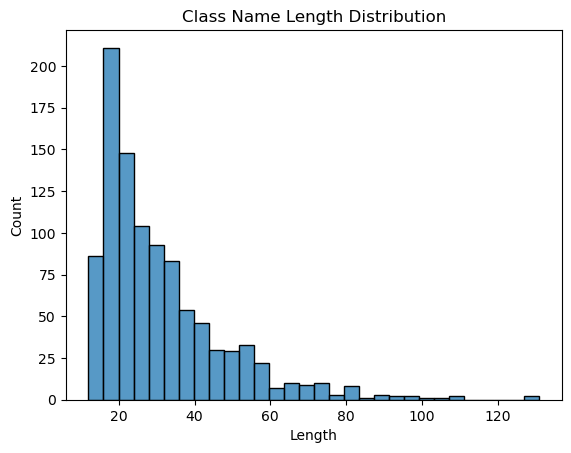

In [45]:
#step 1: Create a histogram to visualize the distribution of the class name lengths
sns.histplot(df['length'], bins=30, )

#step 2: Add the title and axis labels to explain the plot
plt.title('Class Name Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')

#step 3: Show the plot
plt.show()


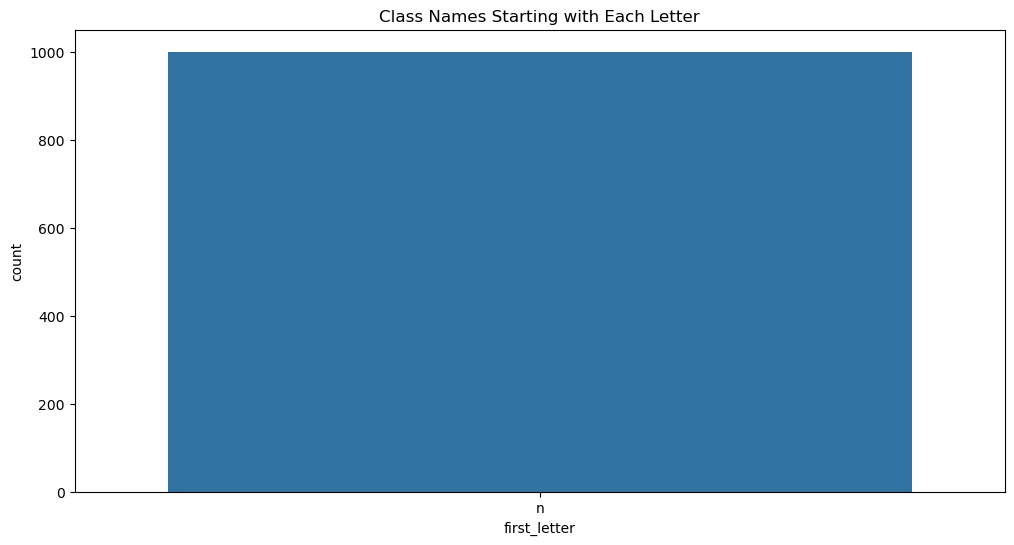

In [19]:
#step 1: set a custom figure size to improve readability
plt.figure(figsize=(12, 6))

#step 2: Create a bar chart showing how many class names start with each letter
sns.countplot(data=df, x='first_letter', order=sorted(df['first_letter'].unique()))

#step 3: Add the title to describe the purpose of the plot
plt.title('Class Names Starting with Each Letter')

#step 4: show the plot
plt.show()

6- PREPROCESS THE DATA


In [39]:

#Step 1: create a new column called class_name_cleaned that contains the class names in lowercase
df['class_name_cleaned'] = df['class_name'].str.lower()

#step 2: replace hyphens and underscores with spaces using .str.replace()
df['class_name_cleaned'] = df['class_name_cleaned'].str.replace('-', ' ').str.replace('_', ' ')

#step 3: remove all non-letter characters using .str.replace() with a regex pattern
#step 4: use .str.replace() with regex=True
# Ensure compatibility with older versions of pandas
df['class_name_cleaned'] = df['class_name_cleaned'].str.replace(r'[^a-z\s]', '', regex=True)
# Display the column names of the dataframe to verify their presence
#print("Column names in the dataframe:", df.columns.tolist())
#step 5: show the first 5 rows to verify the cleaning process
#print(df['class_name_cleaned'].head())

print(df.head())





                                                                                      class_name  \
0                                                                   n01440764 tench, Tinca tinca   
1                                                          n01443537 goldfish, Carassius auratus   
2  n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias   
3                                                      n01491361 tiger shark, Galeocerdo cuvieri   
4                                                         n01494475 hammerhead, hammerhead shark   

   length first_letter  \
0      28            n   
1      37            n   
2      93            n   
3      41            n   
4      38            n   

                                                                  class_name_cleaned  
0                                                                n tench tinca tinca  
1                                                       n goldfish c

7- SPLIT THE DATA

In [43]:
#step 1: use train_test_split to divide 'class_name_clean' into train and test
train, test = train_test_split(df['class_name_cleaned'], test_size=0.2, random_state=42)

train_classes, test_classes = train, test
#step 2: print the number of classes in train and test sets
print(f"Number of classes in train set: {len(train_classes)}")

print(f"Number of classes in test set: {len(test_classes)}")

#step 4: preview the first 5 training classes names
train_classes[:5]

Number of classes in train set: 800
Number of classes in test set: 200


29     n axolotl mud puppy ambystoma mexicanum
535                    n disk brake disc brake
695                                  n padlock
557                       n flagpole flagstaff
836                                 n sunglass
Name: class_name_cleaned, dtype: object